# 📈 Gradient Boosting Classifier

This notebook provides a thorough analysis of the Gradient Boosting classifier, employing it to address our music genre classification challenge.

In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 

import numpy as np
import pandas as pd

We start by loading the stratified data that has been split into the train and test splits respectively.

In [18]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
X_train = df_train.iloc[:,:-1]
y_train = df_train['genre']
X_test = df_test.iloc[:,:-1]
y_test = df_test['genre']

In [19]:
df_train.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,15wos7ChIkysPIrX31hwwa,https://p.scdn.co/mp3-preview/6ee63d690b1d66aa...,1,0.570390,0.609811,0.889349,0.077387,0.033733,0.000466,0.142857,...,0,0,2,1,0,2,1,0,0,4
1,7csz4sW8pAL4M378czLtlD,https://p.scdn.co/mp3-preview/b3a469eb989d29b9...,0,0.464640,0.969831,0.951197,0.163211,0.000232,0.000000,0.252492,...,0,0,0,0,2,0,0,2,0,3
2,3EG9FJ0ToLfgnc1IG2Z1wz,https://p.scdn.co/mp3-preview/d82ed534bd9772e1...,1,0.445913,0.653054,0.902531,0.118129,0.334336,0.000325,0.878738,...,0,0,1,1,0,0,1,0,0,5
3,0f37VQs969vZUL4gVfHRV9,https://p.scdn.co/mp3-preview/ab5bc6e257c6a5a4...,1,0.537343,0.941673,0.889847,0.356316,0.001725,0.000245,0.146179,...,0,0,0,0,1,0,0,0,0,3
4,42ZVk59gT4tMlrZmd8Ijxf,https://p.scdn.co/mp3-preview/ce96eec80fbfd784...,1,0.402952,0.968825,0.911015,0.120781,0.000208,0.126919,0.581395,...,0,0,0,0,3,0,1,1,0,3


In [20]:
df_test.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_country,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre
0,5RG1HRQocUAafoCrGd9lY5,https://p.scdn.co/mp3-preview/f9772fc13fc90d56...,0,0.444812,0.270910,0.657215,0.036162,0.882530,0.000000,0.416944,...,0,0,1,1,0,0,0,0,0,5
1,5toaXJWnmQCnGRh8eOrEwE,https://p.scdn.co/mp3-preview/23b00769d9f4d4b3...,1,0.875523,0.661099,0.818493,0.013983,0.231926,0.000000,0.279070,...,3,0,0,0,0,0,0,0,0,1
2,7b7MKh1kOgwASPihOs7vve,https://p.scdn.co/mp3-preview/0269a1cb51256005...,0,0.608945,0.602772,0.818604,0.534716,0.358433,0.000000,0.174419,...,0,0,0,0,0,0,0,0,0,5
3,5Z3GHaZ6ec9bsiI5BenrbY,https://p.scdn.co/mp3-preview/05e9e3f61b30cf53...,1,0.810531,0.539416,0.862765,0.045564,0.199798,0.000017,0.239203,...,0,0,0,0,0,2,0,0,0,4
4,0m2JqPFRwdhFEvTXQNYwmB,https://p.scdn.co/mp3-preview/be8ee0a916639101...,1,0.639788,0.624896,0.847980,0.013018,0.400601,0.000000,0.144518,...,1,0,0,0,0,1,0,0,0,1


###  🧱 Developing the Model

We perform feature selection for the Gradient Boosting Classifier, using sklearn's SelectFromModel().

In [21]:
gradient = GradientBoostingClassifier()
params = { 
            'loss': ['log_loss','exponential'],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators' : [100, 200, 400],
            'criterion' :['friedman_mse', 'squared_error'],
            'min_samples_split' :[0.01, 0.05, 0.1],
            'max_depth': [3,4,5,6,],
            'max_features': ['sqrt', 'log2']
        }

#Select Features
sel = SelectFromModel(gradient)
X_train_selected = sel.fit_transform(X_train.iloc[:, 2:], y_train)

Next, we perform hyperparameter tuning using GridSearch CV to determine the best model parameters for Gradient Boosting

In [22]:
print("Selected Features Length:", len(sel.get_feature_names_out()))
print("Selected Features:", ", ".join(sel.get_feature_names_out()))

gb_grid = GridSearchCV(estimator = gradient, param_grid = params, cv = 5, n_jobs = -1, verbose=0)
# Fit the random search model
gb_grid.fit(X_train_selected, y_train)

Selected Features Length: 18
Selected Features: danceability, energy, loudness, speechiness, acousticness, mfcc_1Mean, mfcc_3Mean, mfcc_5Std, mfcc_7Std, spect_centroid_Std, spect_contrast_Mean, artist_genre_contemporary, artist_genre_country, artist_genre_hip, artist_genre_hop, artist_genre_metal, artist_genre_pop, artist_genre_rap


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 400]})

In [23]:
# Best parameters based on GridSearchCV
gb_grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 0.01,
 'n_estimators': 400}

### 📝 Model Evaluation

Create and fit the final Gradient Boosting model based on the hyperparameters found through GridSearchCV above

In [24]:
gradientBooster = GradientBoostingClassifier(**gb_grid.best_params_)
gradientBooster.fit(X_train_selected, y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_depth=6, max_features='sqrt',
                           min_samples_split=0.01, n_estimators=400)

Evaluate the Gradient Boosting Classifier on the test set and determine it's accuracy.

In [25]:
X_test_selected = X_test[sel.get_feature_names_out()]
predictions = gradientBooster.predict(X_test_selected)
acc = metrics.accuracy_score(predictions,y_test)
acc

0.8358433734939759

### 🏁 Model Performance

Finally, we generate the confusion matrix and performance metrics to determine our Gradient Boosting Classifier's performance

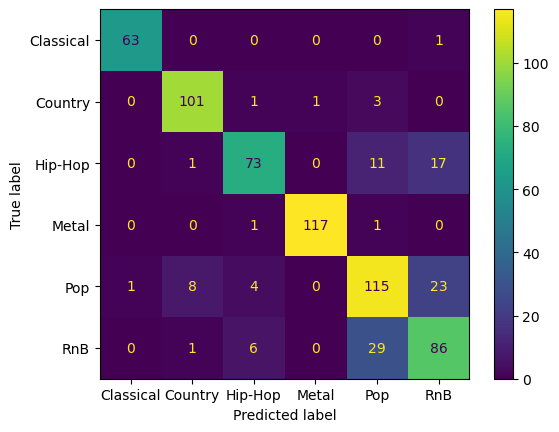

In [26]:
labels = ['Classical', 'Country', 'Hip-Hop', 'Metal', 'Pop', 'RnB']
matrix = metrics.confusion_matrix(predictions, y_test, labels=gradientBooster.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
disp.plot()

In [27]:
print(metrics.classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

   Classical       0.98      0.98      0.98        64
     Country       0.95      0.91      0.93       111
     Hip-Hop       0.72      0.86      0.78        85
       Metal       0.98      0.99      0.99       118
         Pop       0.76      0.72      0.74       159
         RnB       0.70      0.68      0.69       127

    accuracy                           0.84       664
   macro avg       0.85      0.86      0.85       664
weighted avg       0.84      0.84      0.84       664



We conclude our analysis by concatenating our prediction and actual labels with the original DataFrame

In [28]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test)
results = pd.concat([X_test.reset_index(drop=True), actual.reset_index(drop=True), predictions.reset_index(drop=True)], axis=1)
results.head()

,id,preview_url,mode,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,artist_genre_dance,artist_genre_hip,artist_genre_hop,artist_genre_metal,artist_genre_pop,artist_genre_rap,artist_genre_rock,artist_genre_trap,genre,0
0,5RG1HRQocUAafoCrGd9lY5,https://p.scdn.co/mp3-preview/f9772fc13fc90d56...,0,0.444812,0.270910,0.657215,0.036162,0.882530,0.000000,0.416944,...,0,1,1,0,0,0,0,0,5,5
1,5toaXJWnmQCnGRh8eOrEwE,https://p.scdn.co/mp3-preview/23b00769d9f4d4b3...,1,0.875523,0.661099,0.818493,0.013983,0.231926,0.000000,0.279070,...,0,0,0,0,0,0,0,0,1,1
2,7b7MKh1kOgwASPihOs7vve,https://p.scdn.co/mp3-preview/0269a1cb51256005...,0,0.608945,0.602772,0.818604,0.534716,0.358433,0.000000,0.174419,...,0,0,0,0,0,0,0,0,5,5
3,5Z3GHaZ6ec9bsiI5BenrbY,https://p.scdn.co/mp3-preview/05e9e3f61b30cf53...,1,0.810531,0.539416,0.862765,0.045564,0.199798,0.000017,0.239203,...,0,0,0,0,2,0,0,0,4,4
4,0m2JqPFRwdhFEvTXQNYwmB,https://p.scdn.co/mp3-preview/be8ee0a916639101...,1,0.639788,0.624896,0.847980,0.013018,0.400601,0.000000,0.144518,...,0,0,0,0,1,0,0,0,1,1
